# Linaerna regresija

**Linearna regresija** predstavlja problem nalaženja linearne veze između nezavisne promenljive $x$ i zavisne promenljive $y$. Ukoliko je promenljiva $x$ skalar, radi se o prostoj linearnoj regresiji, a ako je promenljiva $x$ vektor, reč je o linearnoj regresiji za funkciju više promenljivih. U oba slučaja, pretpostavka je da je zavisna promenljiva $y$ skalar.

**Prosta linearna regresija** predstavlja nalaženje linearne veze između parova skalara $(x_i, y_i)$, $1 \le i \le n$. Veza je data linearnom funkcijom $f(x) = \beta_0 + \beta_1 x$ po parametrima $\beta_0$ i $\beta_1$ gde su $\beta_0$ i $\beta_1$ parametri koje treba odrediti. Ako je $X=[x_1, \dots, x_n]$ i $Y=[y_1, \dots, y_n]$, izraz se može zapisati u matričnom obliku kao $\begin{bmatrix}1&X\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\\beta_1\end{bmatrix} = Y$, gde je $\begin{bmatrix}1&X\end{bmatrix}$ matrica čija se prva kolona sastoji samo od jedinica, a druga kolona je vektor $X$.

**Linearna regresija za funkciju više promenljivih** predstavlja nalaženje linearne veze između parova vektora i skalara $(X_i, y_i)$, $1 \le i \le n$. Veza je data linearnom funkcijom $f(x_1,\dots,x_m) = \beta_0 + \beta_1 x_1 + \dots + \beta_m x_m$ po parametrima $\beta_0, \dots, \beta_m$ gde su $\beta_0, \dots, \beta_m$ parametri koje treba odrediti. Izraz se može zapisati u matričnom obliku kao $\begin{bmatrix}1&X_1&\cdots&X_m\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\ \vdots \\ \beta_m\end{bmatrix} = Y$, gde je $Y=[y_1, \dots, y_n]$, $\begin{bmatrix}1&X_1&\cdots&X_m\end{bmatrix}$ matrica čija se prva kolona sastoji samo od jedinica, a ostale kolone su redom vektori $X_1,\dots,X_m$. 

Sistem jednačina $\begin{bmatrix}1&X\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\\beta_1\end{bmatrix} = Y$ kod proste linearne regresije, odnosno $\begin{bmatrix}1&X_1&\cdots&X_m\end{bmatrix} \cdot \begin{bmatrix}\beta_0\\ \vdots \\ \beta_m\end{bmatrix} = Y$ kod linearne regresije za funkciju više promenljivih, se najčešće rešava **metodom najmanjih kvadrata**. Takav sistem u praksi obično ima više jednačina nego promenljivih i najčešće nema egzaktno rešenje.

Ako sistem napišemo u obliku $A\beta = Y$, njegovo rešavanje predstavlja nalaženje onog vektora $\beta$ za koji je vrednost izraza $||Y - \beta A||_2^2$ najmanja. Ovde je sa $||a||_2 = \sqrt{a_1^2 + a_2^2 + \dots + a_n^2}$ označena 2-norma vektora $a = (a_1, a_2, \dots, a_n)$. Rešenje je dato u obliku $\beta=(A^{T}A)^{-1}A^{T}Y$, gde se matrica $(A^{T}A)^{-1}A^{T}$ se naziva pseudoinverz matrice $A$.

U slučaju proste linearne regresije, može se pokazati da je $$\beta_1 = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}$$ i $\beta_0 = \bar{y} - \beta_1 \bar{x}$, gde je $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$ aritmetička sredina nezavisnih, a $\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$ zavisnih promenljivih.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Pretpostavimo da raspolažemo skupom parova  $(0, 1.2)$, $(0.5, 2.05)$, $(1, 2.9)$ i $(-0.5,0.1)$ u kojima prvi element predstavlja nezavnisnu promenljivu $x$, a drugi zavisnu promenljivu $y$ i da je potrebno naći linearnu vezu oblika $y=\beta_0+\beta_1x$ između njih.

Za rešavanje zadataka linearne regresije mogu se koristiti funkcije koje smo upoznali u priči o rešavanju preodređenih sistema.

In [2]:
points= [(0, 1.2), (0.5, 2.05), (1, 2.9), (-0.5, 0.1)]
x = np.array([point[0] for point in points])
y = np.array([point[1] for point in points])

In [3]:
n = len(points)

In [4]:
solution, rss, _, _ = np.linalg.lstsq(np.vstack((np.ones(n), x)).T, y, rcond=None)

In [5]:
(beta0, beta1) = solution

In [6]:
print('Resenje je: ', beta0, beta1)

Resenje je:  1.100000000000001 1.8500000000000005


Ipak, u praksi se, posebno u zadacima mašinskog učenja, mnogo češće koristi biblioteka  `scikit-learn`.

**Scikit-learn** je Python biblioteka namenjena mašinskom učenju. U njoj su implementirani mnogobrojni algoritmi klasifikacije, regresije i grupisanja, kao i rutine koje prate pripremu podataka i evaluaciju modela. Na [zvaničnom sajtu](https://scikit-learn.org/stable/) možete istražiti više o funkcionalnostima same biblioteke, a mi ćemo se u daljem radu usredsrediti na linearne modele dostupne kroz `linear_model` paket. 

In [7]:
from sklearn import linear_model

Za rad sa modelima proste linearne regresije predviđena je klasa `LinearRegression`. Ona raspolaže metodom `fit` koja rešava optimizacioni problem, a čiji su argumenti matrica sa kolonama koje predstavljaju vektore nezavisnih promenljivih i vektor čije koordinate predstavljaju zavisne promenljive. Nakon poziva metode `fit`, niz `coef_` predstavlja tražene koeficijente, a `intercept_` slobodni član linearne regresije.

In [8]:
model = linear_model.LinearRegression()

In [9]:
model.fit(x.reshape(-1, 1), y)

LinearRegression()

Koeficijent $\beta_0$:

In [10]:
model.intercept_

1.0999999999999999

Koeficijent $\beta_1$:

In [11]:
model.coef_

array([1.85])

Greška modela linearne regresije može se prikazati na više načina. 


`Srednja apsolutna greška (engl. mean absolute error, MAE)` je prosečna vrednost sume apsolutnih razlika između stvarne i predviđene vrednosti, $\text{MAE} = \frac{1}{n}\sum_{i=1}^n{|y_i - \hat{y_i}|}$.

`Srednjekvadratna greška (engl. mean squared error, MSE)` je prosečnoa vrednost sume kvadrata razlika između stvarne i predviđene vrednosti, $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}{( y_i - \hat{y_i})^2}$. Za nju koristimo i termin suma kvadrata reziduala (engl. residual square sum, RSS).

`Koeficijent determinacija` $R^2$ se račina kao $R^2= 1 - \frac{RSS}{TSS}$, gde je $TSS = \sum_{i=1}^{n} {(y_i-\overline{y})^2}$ ukupna suma kvadrata razlike između stvarne i očekivane vrednosti. Što je vrednost bliža jedinici, greška je manja.

Ove vrednosti možemo izračunati korišćenjem funkcija `metrics` biblioteke `scikit-learn`.

In [12]:
from sklearn import metrics

Funkcijom `predict` se mogu predvideti vrednosti regresionog modela za odgovarajuće unose.

In [13]:
y_predicted = model.predict(x.reshape(-1, 1))

Vrednosti za greške koje smo uveli se mogu dobiti na sledeći nači: 

In [14]:
mae = metrics.mean_absolute_error(y_predicted, y)
mse = metrics.mean_squared_error(y_predicted, y)
r2 = metrics.r2_score(y_predicted, y)

In [15]:
print('MAE = ', mae)
print('MSE = ', mse)
print('R2 = ', r2)

MAE =  0.06249999999999999
MSE =  0.004687499999999999
R2 =  0.9956172388604821


U nastavku će kroz primer reklamiranja na različitim medijima (TV-u, radiju i novinama) biti prikazano kako se linearna regresija može iskoristiti za kreiranje modela koji predviđa uspešnost prodaje. 

U datoteci `advertising.csv` se nalaze informacije o cenama (izraženim u hiljadama dolara) reklamnih usluga na određenom tržištu. Prva kolona se odnosi na cene reklamiranja na televiziji, druga na radiju, a treća u novinama. Četvrta kolona se odnosi na ukupnu prodaju proizvoda koji su se reklamirali na datim medijima. Potrebno je kreirati linearni model koji predviđa prodaju na osnovu cena reklamiranja.

Prvo ćemo pročitati podatke koji se nalaze u datoteci. Sa `index_col=0` je naznačeno da se prva kolona datoteke odnosi na indeksiranje.

In [16]:
import seaborn as sns

In [17]:
data = pd.read_csv('data/advertising.csv', index_col=0)
print('Broj unosa:', data.shape[0])

Broj unosa: 200


In [18]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


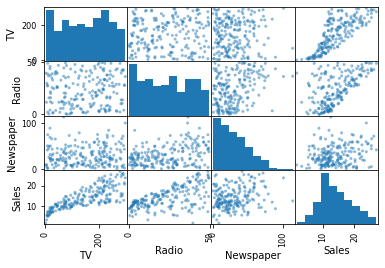

In [19]:
pd.plotting.scatter_matrix(data);

Izvucimo potrebne podatke i proverimo da li postoji linearna zavisnost između svakog načina reklamiranja ponaosob i prodaje.

In [20]:
tv = data['TV']
radio = data['Radio']
newspaper = data['Newspaper']
sales = data['Sales']

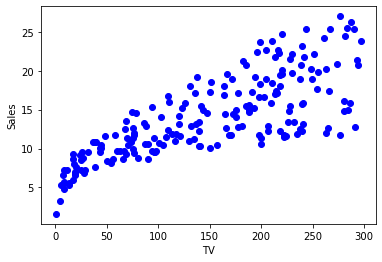

In [21]:
plt.xlabel("TV")
plt.ylabel("Sales")
plt.scatter(tv, sales, color='blue')
plt.show()

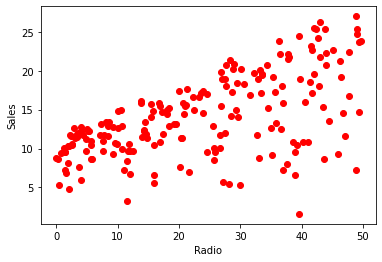

In [22]:
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.scatter(radio, sales, color='red')
plt.show()

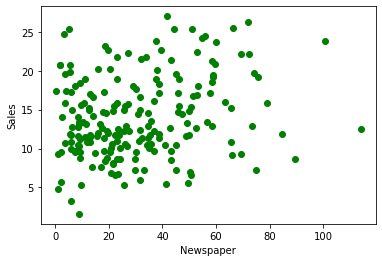

In [23]:
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.scatter(newspaper, sales, color='green')
plt.show()

Zaključujemo da je linearna zavisnost prodaje od reklamiranja na TV-u najveća, a najmanja od reklamiranja u novinama. 

Korišćenjem klase `LinearRegression` formiraćemo regresioni model.

In [24]:
tv_radio_newspaper = data[['TV', 'Radio', 'Newspaper']] #train 


In [25]:
model = linear_model.LinearRegression()
model.fit(tv_radio_newspaper, sales)

LinearRegression()

In [26]:
print('Slobodni clan: ', model.intercept_)
print('Koeficijenti: ', model.coef_)

Slobodni clan:  2.9388893694594085
Koeficijenti:  [ 0.04576465  0.18853002 -0.00103749]


Dakle, formula linearne zavisnosti je $\text{Sales} = 2.9388893694594085 + 0.04576465 \cdot \text{TV} + 0.18853002 \cdot \text{Radio} - 0.00103749 \cdot \text{Newspaper}.$

Pošto su sve vrednosti prikazane na istim skalama, možemo interpretirati dobijene koeficijente: najveći doprinos u ovom modelu ima reklamiranje na radiju, a najmanji reklamiranje u novinama.

Trenutno smo sve raspoložive podatke iskoristili za kreiranje modela pa nemamo podatke na kojima objektivno možemo oceniti kako se ponaša naš model. Zato ćemo se vratiti jedan korak unazad i pre određivanja modela, podeliti podatke na skup za obučavanje modela i skup za testiranje (ocenu) modela. <img src='assets/train_test_podela.png'>

U ovome nam može pomoći funkcija `train_test_split` dostupna u okviru paketa `model_selection` biblioteke `scikit-learn`. Njom se vrši podela skupa u željenoj razmeri (parametar `test_size`) uz kontrolu podele (parametar `random_state`).

In [27]:
from sklearn import model_selection

In [28]:
tv_radio_newspaper_train, tv_radio_newspaper_test, sales_train, sales_test = model_selection.train_test_split(tv_radio_newspaper, sales, test_size=0.33, random_state=1)

Sada možemo ponoviti istu proceduru određivanja modela linearne regresije koristeći kreirani skup za obučavanje.

In [29]:
model = linear_model.LinearRegression()
model.fit(tv_radio_newspaper_train, sales_train)

LinearRegression()

Dalje možemo korektno sprovesti ocenu ovako dobijenog modela.

In [30]:
sales_predicted = model.predict(tv_radio_newspaper_test)

In [31]:
mae = metrics.mean_absolute_error(sales_test, sales_predicted)
mse = metrics.mean_squared_error(sales_test, sales_predicted)
r2 = metrics.r2_score(sales_test, sales_predicted)

In [32]:
print('MAE = ', mae)
print('MSE = ', mse)
print('R2 = ', r2)

MAE =  1.116324307782546
MSE =  2.3046030899361587
R2 =  0.9142453857006445


Koeficijenti našeg novog modela su: 

In [33]:
print('Slobodni clan: ', model.intercept_)
print('Koeficijenti: ', model.coef_)

Slobodni clan:  3.019195161687442
Koeficijenti:  [0.04574124 0.180924   0.0031418 ]


Formula modela sada postaje $\text{Sales} = 3.0191951616874455 + 0.04574124 \cdot \text{TV} + 0.180924 \cdot \text{Radio} + 0.0031418 \cdot \text{Newspaper}.$

Različitim podelama polaznog skupa na skup za treniranje i skup za tesiranje se dobijaju različiti modeli koji imaju nešto drugačije ocene (to možemo lako proveriti promenama parametra random_state). Zbog toga neke podele mogu dati ili previše optimistične ili previše stroge ocene. `Unakrsna validacija` je tehnika kojom se ovakvo ocenjivanje može iskontrolisati. Ona podrazumeva podelu polaznog skupa podataka na $k$ delova (gde je $k$ unapred izabrana vrednost) i obučavanje i testiranje ukupno $k$ modela po shemi prikazanoj na slici. <img src='assets/unakrsna_validacija.png'> 

Svaki model se trenira nad posebno izdvojenih $k-1$ delova (obojenih plavom bojom) i testira na preostalom delu (obojenom narandžastom bojom). Dalje se performanse ovako dobijenih modela mogu agregirati u jednu vrednosti.  

Za evaluaciju modela tehnikom unakrsne validacije može se koristiti metod `cross_val_score`. Njegovi parametri su tip modela, ceo skup podataka i broj podela (parametar `cv`, ekvivalent broja `k`). Podrazumevano se za ocenu modela koristi srednjekvadratna greška, ali se preko parametra `scoring` može navesti i neka druga vrednost.

In [34]:
model = linear_model.LinearRegression()
scores = model_selection.cross_val_score(model, tv_radio_newspaper, sales, cv = 10)

Pojedinačne greške možemo ispisati, ili još informativnije, prikazati grafički.

In [35]:
print('Sve greške po podelama:', scores)

Sve greške po podelama: [0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]


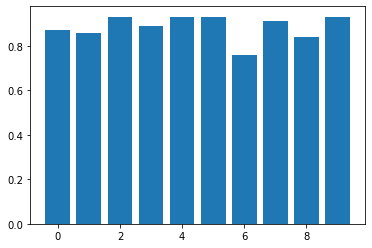

In [36]:
cv = 10
plt.bar(np.arange(0, cv), scores)
plt.show()

In [37]:
print('Srednja vrednost greške:', scores.mean())

Srednja vrednost greške: 0.8853562237979616


Dalje možemo proveriti da li se, eventualno, izuzimanjem neke od veličina (`TV`, `radio` ili `newspaper`) dobija bolji model.

In [38]:
model_tv_radio = linear_model.LinearRegression()
tv_radio = data[['TV', 'Radio']]
scores = model_selection.cross_val_score(model_tv_radio, tv_radio, sales, cv = 10)
final_score = scores.mean()
print('Model TV+Radio: ', final_score)

Model TV+Radio:  0.8869670516810129


In [39]:
model_tv_newspaper = linear_model.LinearRegression()
tv_newspaper = data[['TV', 'Newspaper']]
scores = model_selection.cross_val_score(model_tv_newspaper, tv_newspaper, sales, cv = 10)
final_score = scores.mean()
print('Model TV+Newspaper: ', final_score)

Model TV+Newspaper:  0.6066319724531258


In [40]:
model_radio_newspaper = linear_model.LinearRegression()
radio_newspaper = data[['Radio', 'Newspaper']]
scores = model_selection.cross_val_score(model_radio_newspaper, radio_newspaper, sales, cv = 10)
final_score = scores.mean()
print('Model Radio+Newspaper: ', final_score)

Model Radio+Newspaper:  0.2896575080826855


Rezultati ukazuju na najbolje ponašanje modela koji koristi samo veličine `TV` i `Radio`.